## Urbanity Basic Functionality (20 minutes)

This notebook provides a brief introduction to the main functionalities of the Urbanity python package. We provide an overview of how users can interact with map objects, add attributes and indicators to graph nodes, and construct different types of urban networks. Subsequent notebooks will build on feature rich networks obtained through this section to conduct various descriptive, predictive, and comparative tasks for complex urban systems.  

In [1]:
# !poetry add pyarrow

In [2]:
# import package
import urbanity as urb
import geopandas as gpd

### Create base map
Urbanity's base map class builds on ipyleaflet. Accordingly, when users instantiate a Map object, several configurations (layer, draw, basemap controls) are pre-loaded.

On the backend, Urbanity connects names of locations to country centroids to provide a streamlined navigation experience. For our demo, we use Singapore as an example. The Map class takes a country name (e.g. "Singapore") and automatically zooms the map to Singapore. Users can specify `zoom` to change zoom level.

In [3]:
m = urb.Map('Singapore', zoom=11)
m

Map(center=[1.357107, 103.8194992], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

### Adding your own target site

#### Method 1: By Drawing
In some cases, users might prefer a quick, visual, and easy way to specify spatial extent. This can be achieved with the draw functions on the left hand side of the interactive map panel. The in-filled square and polygon objects provide the most intuitive way to achieve this function. When initially called without any drawing, the function prompts the user to begin drawing on the map. As a caveat, the function only supports the drawing of valid polygons (no intersection or holes) ,and only one polygon at the moment. The `show` parameter can be toggled to True (defaults to False) to show a linked map window. Below, we try running the `add_bbox` method without drawing anything on the map.

In [4]:
m.add_bbox(show=True)

No bounding box/polygon found. Please draw on map.


Map(center=[1.357107, 103.8194992], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

Our code returns another map view (because `show` is True) accompanied by the message stating that no bounding box/polygon was found. 

Users are instructed to draw on the map. Let us try running `add_bbox` again after drawing with polygon tool (filled hexagon symbol) on the lefthand side of the map view. Here, we choose to call `m` again, and immediately run `add_bbox` to record the drawn bounding box.

In [5]:
m1 = urb.Map('Singapore')
m1

Map(center=[1.357107, 103.8194992], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

Running `add_bbox` now adds the bounding box to the map object, returning confirmation to the user. Since we set `remove` as False, the object remains on the map view. 

In [6]:
m1.add_bbox(remove = False)

No bounding box/polygon found. Please draw on map.


You can double check the bounding box geometry by accessing the `polygon_bounds` method:

In [7]:
# print(m1.polygon_bounds)

Our bounding box object is simply a shapely polygon geometric object and can be accessed in a familiar way:

In [8]:
# m1.polygon_bounds.geometry.values[0]

#### Method 2: By GeoJSON or Shapefile

<div style="text-align: justify">

Alternatively, users can choose to directly import boundaries from files. This situation is more convenient when areas are huge (e.g. city boundaries) or shapes are too complex to draw by hand. As an example, we provide a geojson shapefile of Tanjong Pagar district in Singapore (Urbanity supports most common file types such as .geojson or.shp). 

Let us begin by first instantiating a new map object which we name `m1`.
</div>

In [9]:
m2 = urb.Map('Singapore')
m2

Map(center=[1.357107, 103.8194992], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [10]:
m2.add_bbox()

No bounding box/polygon found. Please draw on map.


Downtown Core resides in Singapore's Central Business District (CBD). We proceed to connect our file to our map object through the `add_polygon_boundary` method. The method takes in a filepath.

In [11]:
m2.add_polygon_boundary('https://figshare.com/ndownloader/files/42515773')
# m2.add_polygon_boundary(file_path='/home/srg/projects/urbanity/data/Singapore.osm.pbf')

Similarly, users can access the geographic object through the `polygon_bounds` attribute which in the case of shapefiles returns a geopandas dataframe. Users can access the shapely polygon object by indexing into the geometry column.

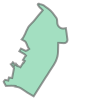

In [12]:
m2.polygon_bounds.geometry.values[0]

Last but not least, polygon boundaries can be removed from our map via the `remove_polygon_boundary` method. Upon running the function, the previously added polygon boundary is removed. 

In [13]:
m2.remove_polygon_boundary()

Polygon bounding layer removed.


Running `remove_polygon_boundary` confirms that our polygon has been removed from our map. Note, the previously added attribute still remains and can be easily reset by uploading a new polygon file or setting `polygon_bounds` to None.

### Constructing Feature Rich Urban Networks 

Next, we demonstrate the mainstay of our package: construction of feature rich primal planar networks.

We demonstrate this function for Downtown Core district. At a glance, the method `get_street_network` serves as a high-level function call that returns three objects: 1) NetworkX graph object; 2) GeoDataFrame consisting of graph nodes and their attributes; and 3) Geodataframe of graph edges and their attributes. 

The function takes one positional argument `location`. Under the hood, `get_street_network` downloads and stores OSM data in a newly created './data' folder in the current user directory. Pre-downloaded OSM data (from GeoFabrik) is usually provided at the country level. The `location` argument is used to finetune download to only extract OSM data for individual cities. In our case, Singapore is both a country and a city. Hence, we pass in "Singapore" to `location`. For other countries, the country might not correspond to city. As an example, an analysis for the United Kingdom might specify location as 'London'.

We also set `graph_attr`, `building_attr`, `svi_attr`, `pop_attr`, and `poi_attr` to `True`, returning a feature rich network graph. More specifically, we buffer each node in our graph by a distance of 100 metres as specified by the `bandwidth=100` argument. Users can adjust bandwidth according to their preference and use cases. These attributes can be set and customised according to the user's use case and requirements.

In [14]:
network, intersection, streets = m2.get_street_network(location='Singapore', 
                                               graph_attr=True,
                                               building_attr=True, 
                                               pop_attr=True, 
                                               svi_attr=True,
                                               poi_attr=True,
                                               bandwidth=100,
                                               edge_attr=True,
                                               catchment_attr=True)

Creating data folder and downloading osm street data...
Data extracted successfully. Proceeding to construct street network.
Network constructed. Time taken: 14.
Network catchment-100m attributes computed. Time taken: 15.
Topologic/metric attributes computed. Time taken: 18.
Building attributes computed. Time taken: 22.
Using non-tiled population data.
Population attributes computed. Time taken: 167.
Points of interest computed. Time taken: 168.
SVI attributes computed. Time taken: 261.
Total elapsed time --- 261 seconds ---


We can print and show the number of nodes and edges for Downtown Core precinct. 

In [15]:
print(f"Number of nodes: {len(intersection)} and number of edges: {len(streets)}.")

Number of nodes: 1322 and number of edges: 3650.


<div style="text-align: justify">
    On first run, the function takes some time to download OSM data. In our case, OSM data for Singapore (21 MB) took 38 seconds to download. Subsequent runs will not re-download the data and will take significantly shorter time. As the function runs, it provides an update to users on the state of indicators computed/completed. Time taken for computation depends on the number of indicator groups chosen and site area. For our urban precinct (around $21km^2$), computation of all features takes ~3 minutes. We do a quick visualisation of graph nodes and edges of our target site. 
</div>

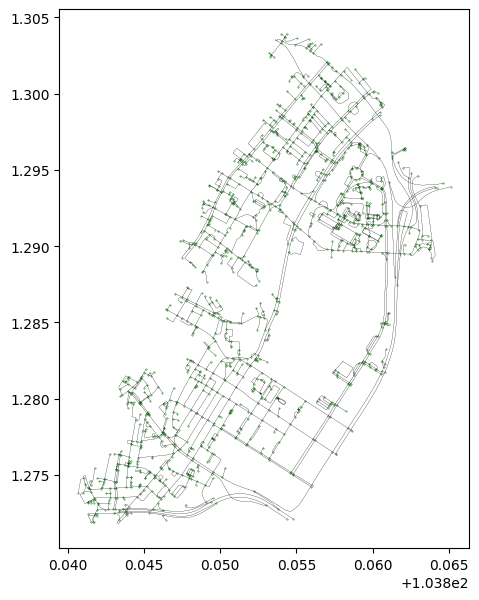

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,7))
intersection.plot(ax=ax, color='green', markersize=0.1)
streets.plot(ax=ax, color='black', linewidth=0.1)
plt.show()

We also display the first five rows of our nodes and edges attribute table. Our node attribute table contains the basic node information in the first four columns:  `osmid`, `x`, `y`, and `geometry`. Subsequent columns include metric, topological, contextual, and semantic indicators which are computed for each node. 

In [17]:
print(list(streets.columns))

['edge_id', 'u', 'v', 'length', 'geometry', 'street_total_building_area', 'street_mean_building_area', 'street_std_building_area', 'street_total_building_perimeter', 'street_mean_building_perimeter', 'street_std_building_perimeter', 'street_num_buildings', 'street_mean_building_bid_complexity', 'street_std_building_bid_complexity', 'street_mean_building_bid_circ_compact', 'street_std_building_bid_circ_compact', 'street_mean_building_bid_convexity', 'street_std_building_bid_convexity', 'street_mean_building_bid_corners', 'street_std_building_bid_corners', 'street_mean_building_bid_elongation', 'street_std_building_bid_elongation', 'street_mean_building_bid_orientation', 'street_std_building_bid_orientation', 'street_mean_building_bid_perimeter', 'street_std_building_bid_perimeter', 'street_mean_building_bid_longest_axis_length', 'street_std_building_bid_longest_axis_length', 'street_mean_building_bid_eri', 'street_std_building_bid_eri', 'street_mean_building_bid_fractaldim', 'street_std

In [18]:
streets[['edge_id', 'u', 'v', 'length', 'street_num_buildings','street_mean_building_bid_complexity', 'PopSum', 'Men', 'Women', 'Elderly', 'Civic', 'Commercial', 'Entertainment', 'Food', 'street_num_images', 'street_mean_GreenView' ]]

,edge_id,u,v,length,street_num_buildings,street_mean_building_bid_complexity,PopSum,Men,Women,Elderly,Civic,Commercial,Entertainment,Food,street_num_images,street_mean_GreenView
0,0,233879753,12071463879,17.826,0,0.000,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.238355
1,1,233879753,233879421,21.389,0,0.000,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.432000
2,2,233879753,12071463880,35.542,0,0.000,1,0,0,0,0.0,0.0,0.0,0.0,1.0,0.251000
3,3,233879753,172510077,218.969,1,14.539,5,2,2,1,0.0,0.0,0.0,0.0,6.0,0.144167
4,4,1832823872,1832823893,20.648,0,0.000,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.259000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,3645,12322889994,12322889999,87.776,1,45.648,7,3,3,1,0.0,0.0,0.0,0.0,0.0,0.238355
3646,3646,12431164228,12431164229,12.982,1,25.172,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.216056
3647,3647,12431164240,12431164243,36.601,1,35.306,2,1,1,0,0.0,0.0,0.0,0.0,0.0,0.216056
3648,3648,1221408584,3010901912,286.042,3,49.441,16,8,8,3,0.0,0.0,10.0,2.0,0.0,0.238355


In [19]:
intersection.head()[['intersection_id', 'intersection_num_nodes', 'intersection_total_street_length', 'intersection_degree', 'intersection_num_buildings', 'intersection_mean_building_bid_circ_compact', 'intersection_std_building_bid_circ_compact', 'PopSum',]]

,intersection_id,intersection_num_nodes,intersection_total_street_length,intersection_degree,intersection_num_buildings,intersection_mean_building_bid_circ_compact,intersection_std_building_bid_circ_compact,PopSum
0,0,7,1763.235,4,7,0.441,0.107,29
1,1,12,1612.342,3,34,0.345,0.108,40
2,2,9,1853.874,4,11,0.448,0.171,29
3,3,16,2322.170,3,15,0.450,0.166,32
4,4,11,1533.214,3,9,0.458,0.130,31


Similar to OSMnx, we employ edge simplification to simplify network edges. More specifically, interstitial nodes are removed with their linestring geometry preserved. Such edges record multiple osmid which includes the osmid of removed nodes. With this context rich representation of networks, we can visualise how different attributes are distributed and answer many important planning questions. For example, which streets have the most greenery and the most number of young children living at their intersections? 

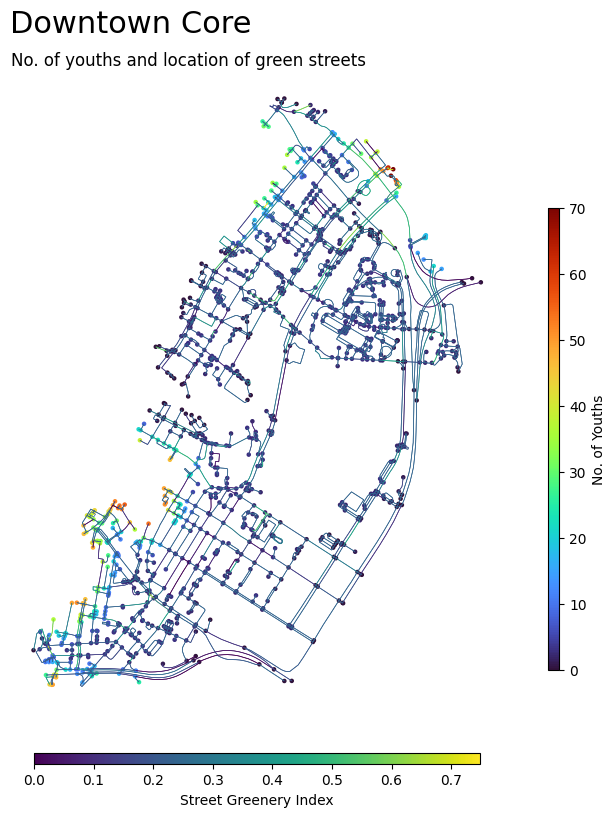

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,12))
intersection.plot(column = 'Youth', 
                  ax=ax, cmap='turbo',
                  markersize=5, 
                  legend=True,
                  legend_kwds={'label': "No. of Youths",
                             'orientation': "vertical",
                             'shrink': 0.5,
                             'anchor':(-1, 0.7), 
                             'aspect':40}
                 )
streets.plot(column = 'street_mean_GreenView', 
             ax=ax, cmap='viridis', 
             linewidth=0.5, 
             legend=True, 
             legend_kwds={'label': "Street Greenery Index",
                             'orientation': "horizontal",
                             'shrink': 0.6,
                             'anchor':(0.5, 1.8), 
                             'aspect':40, 
                             'ticks':None})

# Add title and subtitles
ax.set_title('No. of youths and location of green streets', fontsize=12, loc='left', pad=0)
fig.suptitle('Downtown Core', fontsize=22, x=0.229, y = 0.93, horizontalalignment='left')

ax.set_axis_off()
plt.show()

### Construct Dual Network

Another popular representation of networks in the literature is 'dual' or 'edge' networks. These networks are commonly employed in Space Syntax. Compared to the primal planar network, dual networks focus on the connectivity between streets. Dual network representations focus on the connectivity and accessibility aspects of urban networks. Urbanity offers an automated way to connect dual graphs for real world urban networks. 

**In Urbanity v0.4.0, each map object will cache any pre-computed geospatial data for faster downstream processing**. In the previous step, we used the `get_street_network` function to compute street network. If we look at the `m2.network` attribute, we can see that the previously computed network has been stored. Users can view attributes simply by calling them directly (e.g. `m2.network`).

In [21]:
if m2.network:
    print('Network found.')

Network found.


We can skip download and recomputation of the base network, building, or street view imagery data layers and directly compute what we need. For example, the example below shows how we can directly compute a dual graph representation for our area of interest. **Note: The map object's spatial extent must remain consistent since the data is downloaded for only the target area of interest. If another target area is required, the fastest way is the create another map object**.

In [22]:
dual_network, dual_intersection, dual_streets = m2.get_street_network(location = 'Singapore', dual=True)

Network data found, skipping re-computation
--- 0.976 seconds ---


Similar to primal planar, the process takes a short time at around 20 seconds. Unlike the primal planar network, the nodes and edges on the dual network represent street midpoints and adjacency links between streets respectively. Dual network graphs focus on contiguity relationship between edges.

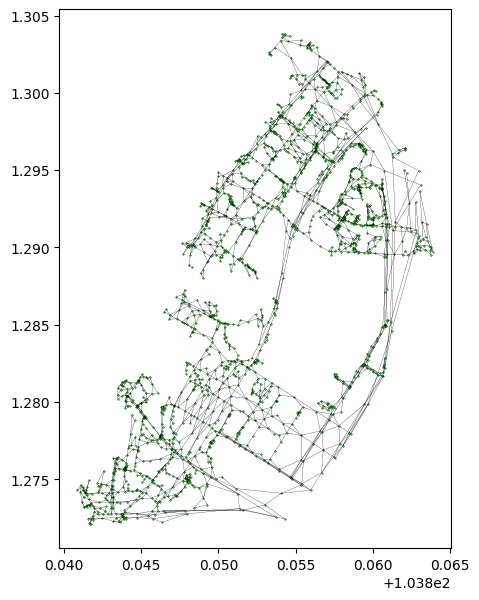

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,7))
dual_intersection.plot(ax=ax, color='green', markersize=0.1)
dual_streets.plot(ax=ax, color='black', linewidth=0.1)
plt.show()

### Constructing Aggregate Indicators

While node level information is useful for various graph level tasks, planners are often more interested in aggregate statistics for an area of interest. Urbanity allows planners to retrieve such aggregated indicators for any geographical scale through the `get_aggregate_stats` method. Now, we look at the United States and obtain aggregate indicators for an arbitrary bounding area in Seattle. 

#### Option 1: Arbitrary bounding box
One way to extract aggregate indicators is to simply draw a bounding box on the map. This can be useful for instances where the target area of interest does not correspond to census tracts. First we instantiate a new map object, draw a hypothetical area of interest, and use the `add_bbox` method to draw an arbitrary bounding box in Seattle.

In [27]:
m3 = urb.Map('United States', zoom = 12)
m3.center = (47.5837304,-122.35882)
m3

Map(center=[47.5837304, -122.35882], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

In [28]:
m3.add_bbox()

Assigned bbox to map object. Removing drawn boundary.


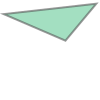

In [29]:
m3.polygon_bounds.geometry[0]

With our specified bounding box, we can proceed to use the `get_aggregate_stats` method to extract contextual indicators within that target area. The function returns the aggregate statistics for the entire spatial extent. 

In [30]:
subzone_gdf = m3.get_aggregate_stats("Seattle", get_svi=True)

Creating data folder and downloading osm street data...
Data extracted successfully. Computing aggregates from shapefile.
Using tiled population data.
Population attributes computed. Time taken: 580.


In [31]:
subzone_gdf.columns

Index(['index', 'geometry', 'subzone_area', 'subzone_perimeter',
       'subzone_num_nodes', 'subzone_num_edges', 'subzone_node_density',
       'subzone_edge_density', 'subzone_total_edge_length',
       'subzone_mean_edge_length', 'subzone_std_edge_length',
       'subzone_edge_length_density', 'subzone_mean_node_degree',
       'subzone_total_building_area', 'subzone_building_footprint_proportion',
       'subzone_mean_building_area', 'subzone_std_building_area',
       'subzone_total_building_perimeter', 'subzone_mean_building_perimeter',
       'subzone_mean_building_bid_complexity',
       'subzone_std_building_bid_complexity',
       'subzone_mean_building_bid_circ_compact',
       'subzone_std_building_bid_circ_compact',
       'subzone_mean_building_bid_convexity',
       'subzone_std_building_bid_convexity',
       'subzone_mean_building_bid_corners', 'subzone_std_building_bid_corners',
       'subzone_mean_building_bid_elongation',
       'subzone_std_building_bid_elongation

In [32]:
subzone_gdf[['index', 'geometry', 'subzone_area', 'subzone_perimeter',
       'subzone_num_nodes', 'subzone_num_edges', 'subzone_node_density', 'PopSum', 'Commercial', 'subzone_mean_Green_View','subzone_std_Green_View']]

,index,geometry,subzone_area,subzone_perimeter,subzone_num_nodes,subzone_num_edges,subzone_node_density,PopSum,Commercial,subzone_mean_Green_View,subzone_std_Green_View
0,area_0,"POLYGON ((545290.667 5268973.396, 551478.668 5...",10.266895,15.377498,2290,5824,223.047,9052,60,0.129672,0.143377


#### Option 2: Getting aggregate indicators by shapefile
A more convenient way to obtain aggregate indicators is to pass a polygon shapefile via the `add_polygon_boundary` method. While `get_street_network` only allows for single entities (due to the connected nature of networks), `get_aggregate_stats` allow users to simultaneously obtain aggregate indicators for multiple entities. For example, we demonstrate how we can easily compute indicators for all subzones in Seattle. First we add and visualise Seattle subzones on a new map object (in this case we specify `center` and `zoom` manually to zoom in onto Seattle city. **Remember to create a new map object because we are dealing with a separate spatial extent of Seattle now**.

In [33]:
m4 = urb.Map(country = "United States", zoom=10)
m4.center = (47.5837304,-122.35882)
m4

Map(center=[47.5837304, -122.35882], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

Next, adding the subzone information to the map is as simple as calling the `add_polygon_boundary` method. An additional layer shows up on our map with subzones of Seattle. We obtain data boundary of Seattle from [GADM](https://gadm.org/).

In [34]:
# def dissolve_poly(gdf, name):
#     """Function to help dissolve administrative subzones into one multipolygon

#     Args:
#         filepath (str): Filepath to administrative subzone file.
#         name (str): Name to assign aggregated spatial boundary (e.g., Singapore).

#     Returns:
#         geopandas.GeoDataFrame: A aggregated dataframe object with merged subzones. 
#     """    
#     if isinstance(gdf, str):
#         gdf = gpd.read_file(gdf)
    
#     gdf[name] = name
#     gdf = gdf.dissolve(name).reset_index()
#     return gdf

# gdf = gpd.read_file('https://figshare.com/ndownloader/files/41053475')
# timestamp_columns = gdf.select_dtypes(include=['datetime64', 'timedelta64']).columns
# gdf = gdf.drop(columns=timestamp_columns)
# # print(gdf)

# if len(gdf) > 1:
#     gdf = dissolve_poly(gdf, "United States")

# # Assign polygon boundary attribute to polygon object
# gdf = gdf.to_crs('epsg:4326')
# print(gdf.CRA_NAM)

In [35]:
m4.add_polygon_boundary('https://figshare.com/ndownloader/files/41053475')

A visual inspection of our dataframe object shows that there are 12 subzones under the `CRA_NAM` column. 

In [36]:
print(m4.polygon_bounds.CRA_NAM)

0                          Whittier Heights
1                                  Interbay
2                               Miller Park
3             Olympic Hills/Victory Heights
4                             Duwamish/SODO
5                             Columbia City
6                  Central Area/Squire Park
7                            Licton Springs
8                               Wallingford
9     Pioneer Square/International District
10                            Arbor Heights
11                               High Point
12                      Wedgwood/View Ridge
Name: CRA_NAM, dtype: object


Next, all we have to do it is call `get_aggregate_stats` with `column='CRA_NAM'` which tells the function which column corresponds to the names of each subzone. For multiple subzones, `get_aggregate_stats` provides feedback to the user on the computation process for each subzone.

In [37]:
aggregate_gdf = m4.get_aggregate_stats("Seattle", column='CRA_NAM', get_svi=True)

Creating data folder and downloading osm street data...
Data extracted successfully. Computing aggregates from shapefile.
Using tiled population data.
Population attributes computed. Time taken: 537.


In [38]:
aggregate_gdf

,CRA_NAM,geometry,subzone_area,subzone_perimeter,subzone_num_nodes,subzone_num_edges,subzone_node_density,subzone_edge_density,subzone_total_edge_length,subzone_mean_edge_length,...,subzone_mean_Green_View,subzone_std_Green_View,subzone_mean_Sky_View,subzone_std_Sky_View,subzone_mean_Building_View,subzone_std_Building_View,subzone_mean_Road_View,subzone_std_Road_View,subzone_mean_Visual_Complexity,subzone_std_Visual_Complexity
0,Whittier Heights,"MULTIPOLYGON (((547579.459 5280078.567, 547582...",15.245253,20.318025,3654,10242,239.681,671.816,633054.137,61.809621,...,0.234865,0.163768,0.302298,0.176229,0.073013,0.086507,0.128416,0.109648,1.598761,0.229943
1,Interbay,"MULTIPOLYGON (((548725.85 5274777.605, 549014....",21.822441,22.192806,6621,16834,303.403,771.408,921784.638,54.757315,...,0.279507,0.167112,0.354036,0.192114,0.063800,0.080126,0.097330,0.103651,1.486155,0.251458
2,Miller Park,"MULTIPOLYGON (((553695.251 5277372.334, 555808...",11.910920,23.909799,2585,7370,217.028,618.760,447609.599,60.734003,...,0.247056,0.183336,0.212058,0.178958,0.090199,0.108995,0.159333,0.099988,1.645587,0.278290
3,Olympic Hills/Victory Heights,"MULTIPOLYGON (((553198.418 5283732.444, 553215...",17.982914,24.872852,4719,11906,262.416,662.073,660686.801,55.491920,...,0.282200,0.171993,0.288146,0.154867,0.036456,0.059662,0.155208,0.092121,1.602895,0.198417
4,Duwamish/SODO,"MULTIPOLYGON (((554320.64 5264487.451, 554340....",32.605900,33.553727,8583,22850,263.235,700.793,1538693.119,67.338867,...,0.158949,0.113420,0.330702,0.145782,0.031791,0.057650,0.231959,0.118813,1.626992,0.190366
5,Columbia City,"MULTIPOLYGON (((554963.391 5262061.816, 554959...",28.723043,32.822312,4694,12024,163.423,418.619,721023.104,59.965328,...,0.180419,0.144449,0.300578,0.176366,0.022018,0.040310,0.216808,0.108091,1.632956,0.263346
6,Central Area/Squire Park,"MULTIPOLYGON (((555237.599 5272251.849, 555158...",13.056809,16.074913,2430,6726,186.110,515.134,363618.669,54.061652,...,0.327069,0.159221,0.217883,0.139818,0.064227,0.070386,0.159060,0.083113,1.685865,0.225512
7,Licton Springs,"MULTIPOLYGON (((551223.191 5281300.344, 551239...",24.853065,31.829225,7354,19796,295.899,796.521,1118122.526,56.482245,...,0.233723,0.146313,0.299891,0.137166,0.041427,0.055752,0.143091,0.087997,1.675844,0.187177
8,Wallingford,"MULTIPOLYGON (((548823.698 5274874.343, 549597...",11.549047,23.899931,3442,9894,298.033,856.694,605977.262,61.246944,...,0.181915,0.140779,0.298818,0.158666,0.076205,0.100792,0.176959,0.107042,1.679055,0.204936
9,Pioneer Square/International District,"MULTIPOLYGON (((550774.584 5272253.964, 551058...",2.418971,10.081227,870,2658,359.657,1098.814,169807.612,63.885482,...,0.127173,0.115654,0.241411,0.149102,0.189878,0.138143,0.148861,0.097165,1.751826,0.180047


Last but not least, we can visualise the list of computed aggregate indicators for each subzone. This helps us to understand how different subzones compare with one another. Due to space constraints, we show stats computed for five subzones.

### Visualisation of Aggregate Statistics

#### Choropleth Spatial Plots
One of the most intuitive ways of understanding urban characteristic is to look at the spatial distribution of urban attributes. For example, we can employ choropleth maps to look at which areas have the highest population count or greenest streets. We implement a quick facet plot below across nine attributes:

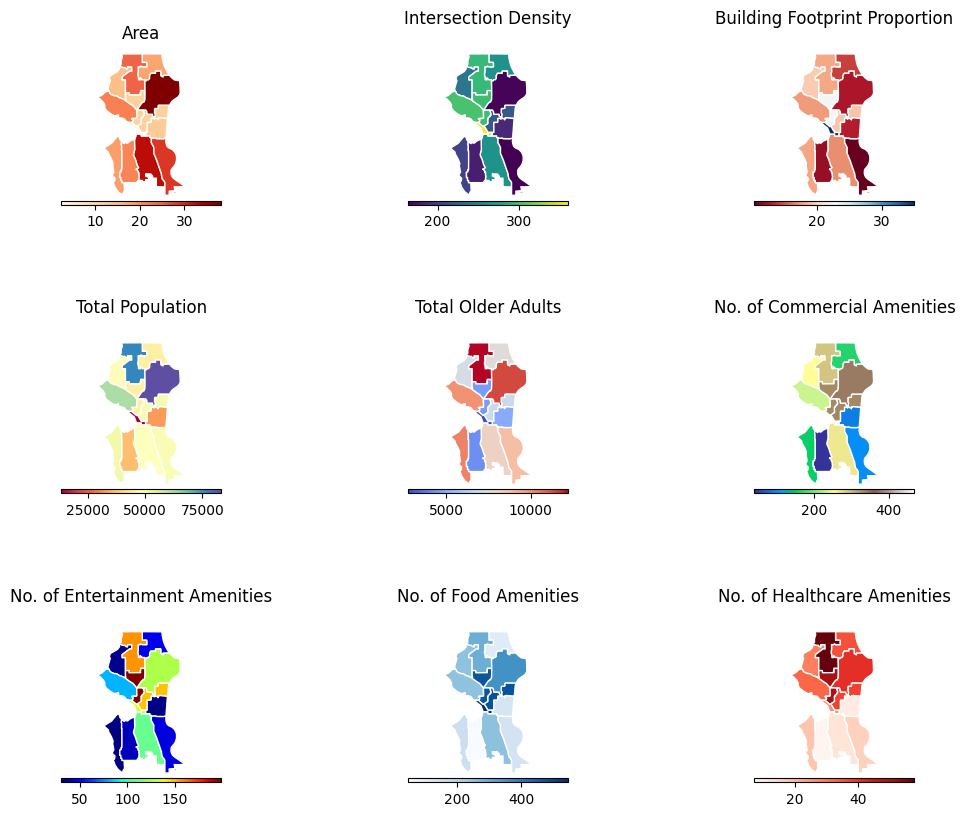

In [39]:
# Select columns to plot, assign concise and readable label names, and choose custom color maps
column = ['subzone_area', 'subzone_node_density', 'subzone_building_footprint_proportion', 'PopSum' ,'Elderly', 'Commercial', 'Entertainment', 'Food', 'Healthcare']
labelnames = ['Area', 'Intersection Density', 'Building Footprint Proportion', 'Total Population', 'Total Older Adults', 'No. of Commercial Amenities', 'No. of Entertainment Amenities', 'No. of Food Amenities', 'No. of Healthcare Amenities']
cmaps = ['OrRd', 'viridis', 'RdBu', 'Spectral', 'coolwarm', 'terrain', 'jet', 'Blues', 'Reds']

# Facet plot of choropleth maps for each computed attribute
fig,ax = plt.subplots(figsize=(16,8), nrows=3, ncols=3)
axs = ax.flatten()
# Customise plot with colorscale, 
for idx in range(9):
    aggregate_gdf.plot(column=column[idx], ax=axs[idx], cmap=cmaps[idx], legend=True, edgecolor='white',
               legend_kwds={
                             'orientation': "horizontal",
                             'shrink': 0.60,
                             'anchor':(0.5, 2.2), 
                             'aspect':40, 
                             'ticks':None}
                )
    axs[idx].set_title(f"{labelnames[idx]}")
    axs[idx].axis('off')
    
plt.subplots_adjust(left=0,
                    bottom=0,
                    right=0.6,
                    top=1,
                    wspace=0.3,
                    hspace=0.3)

plt.show()

### Conclusion 

Towards developing our understanding of complex urban systems, it is important to consider the multi-dimensionality of our urban networks. In this regard, Urbanity provides an integrated, generalisable, and extendable interface to extract semantic and contextual information from urban networks. 

In this short notebook, we describe the main functionalities of Urbanity. We also show how the indicators can be employed for descriptive and exploratory analysis. Indicators extracted from Urbanity can be employed not only for visualising urban systems but also for predictive urban analytical tasks. Subsequent notebooks will demonstrate how outputs from Urbanity can be used for graph machine learning, network assortativity analysis, and benchmarking across urban systems. 